LINEAR REGRESSION

Load Housing Dataset for Regression

In [1]:
from sklearn import datasets
housing=datasets.load_boston()
x=housing.data
y=housing.target
print(x.shape)
print(y)

(506, 13)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 5

Create Data frame

In [4]:
import pandas as pd
X=pd.DataFrame(x,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
Y=pd.DataFrame(y,columns=['MEDV'])
data=pd.concat([X,Y],axis=1)
print(data.head())
print()
print('Data Shape: ',data.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Data Shape:  (506, 14)


Exploratory data analysis (EDA)

An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


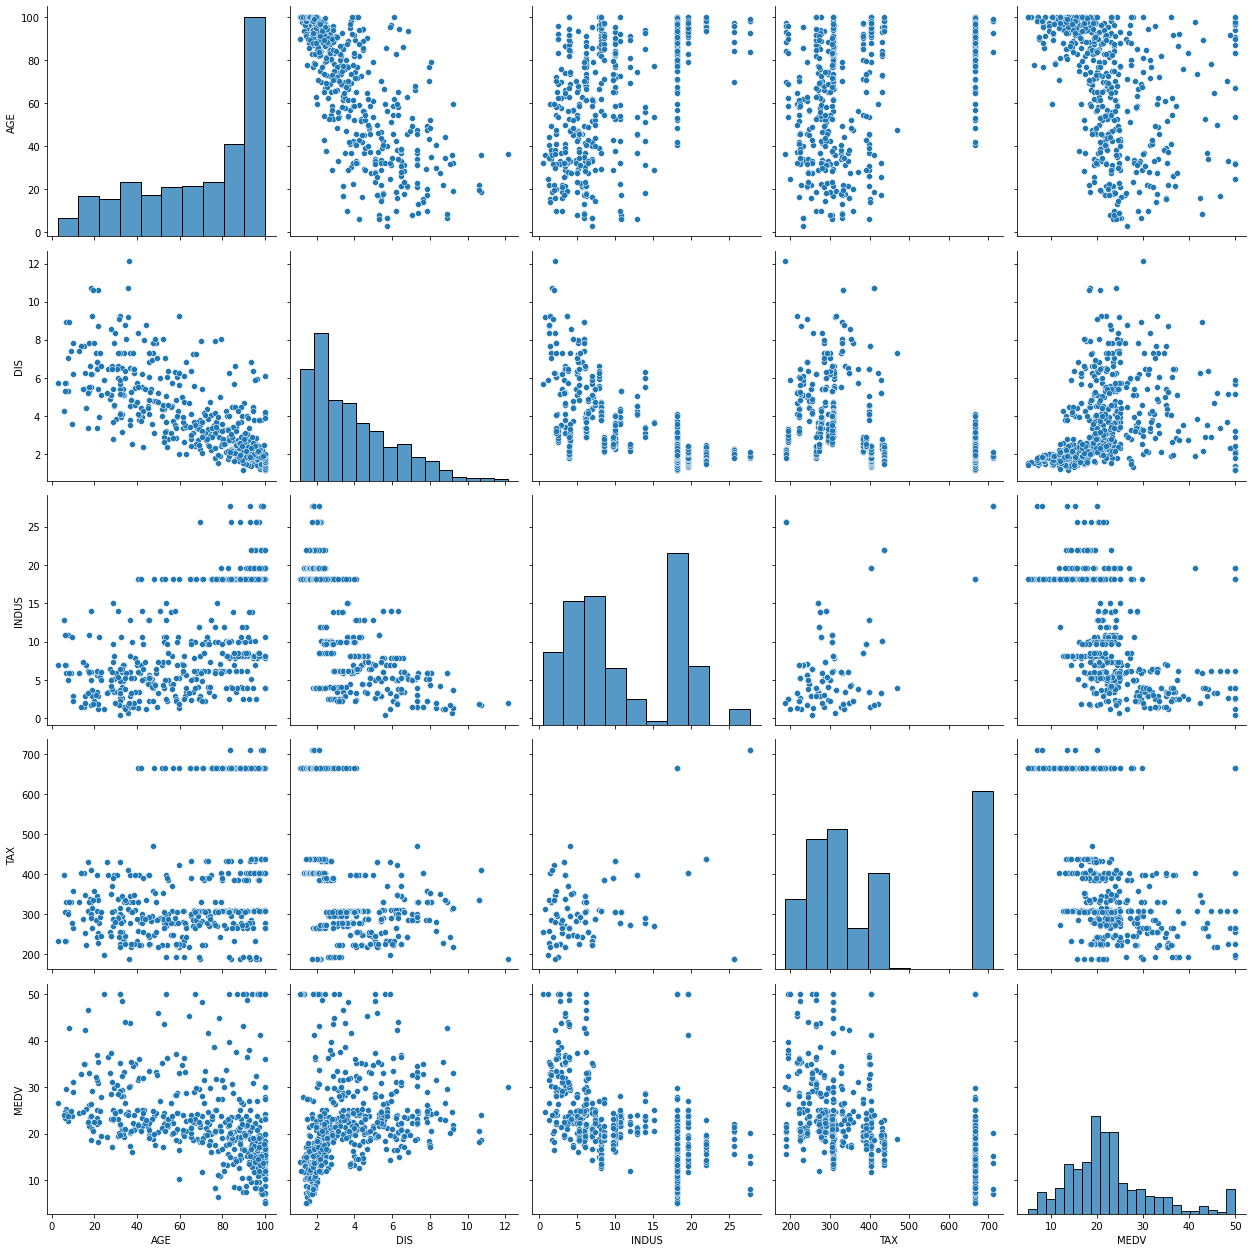

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
col=['AGE','DIS','INDUS','TAX','MEDV']
sns.pairplot(data[col],size=3.5)
plt.tight_layout()
plt.show()

Correlation Analysis

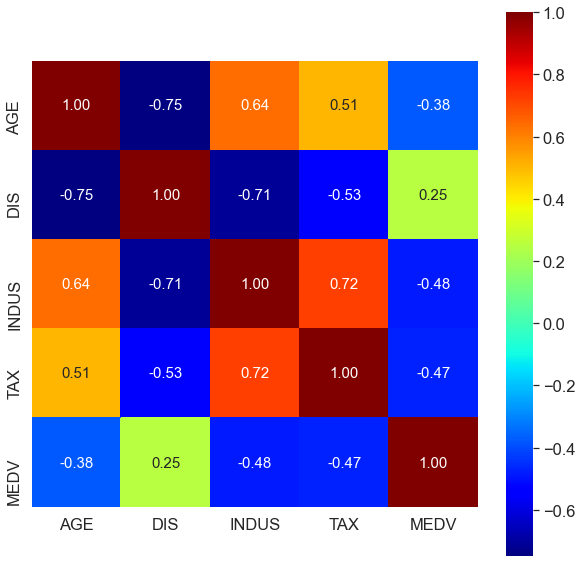

In [6]:
import numpy as np
cm=np.corrcoef(data[col].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
hm=sns.heatmap(cm,cmap='jet',cbar=True,annot=True,square=True,fmt='.2f',
               annot_kws={'size':15},yticklabels=col,
               xticklabels=col)
plt.show()


Select one feature and Train Logistic regression 

slope:9.102
Intercept:-34.671


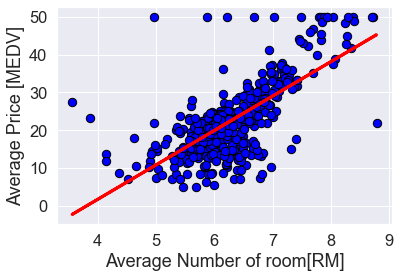

In [7]:
x=data[['RM']].values
y=data[['MEDV']].values
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
print('slope:%.3f'%lr.coef_[0])
print('Intercept:%.3f'%lr.intercept_)
y_pred=lr.predict(x)
plt.scatter(x,y,c='blue',edgecolor='black',s=70)
plt.plot(x,y_pred,color='red',lw=3)
plt.xlabel('Average Number of room[RM]')
plt.ylabel('Average Price [MEDV]')
plt.show()


Compute Mean square error and R2 score

In [8]:
y_pred=lr.predict(x)
from sklearn.metrics import mean_squared_error,r2_score
print('MSE :=%.2f'%(mean_squared_error(y,y_pred)))
print('R2 Score :=%.2f'%(r2_score(y,y_pred)))


MSE :=43.60
R2 Score :=0.48


Split Data (Training 70%, Testing 30%)

In [9]:
x=data.iloc[:,:-1].values
y=data[['MEDV']].values
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,
                       test_size=0.3,random_state=0)
print('Training Data ',x_train.shape)
print('Testing Data ',x_test.shape)

Training Data  (354, 13)
Testing Data  (152, 13)


Train Logistic Regression


In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)


Print training and Testing Performance

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, \n       Test:%.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))

print('R2_Score train: %.3f,\n        Test:%.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))


MSE train: 19.958, 
       Test:27.196
R2_Score train: 0.765,
        Test:0.673


Select Feature 'RM' and Target to fit Model

In [15]:
x=data[['RM']].values
y=data[['MEDV']].values
from sklearn.linear_model import LinearRegression,RANSACRegressor
ransac=RANSACRegressor(LinearRegression(),
                       max_trials=100,
                       min_samples=50,
                       loss='absolute_loss',
                       residual_threshold=5.0,random_state=0)
ransac.fit(x,y)
y_pred=ransac.predict(x)

Print and plot slope and intercept of fitted model

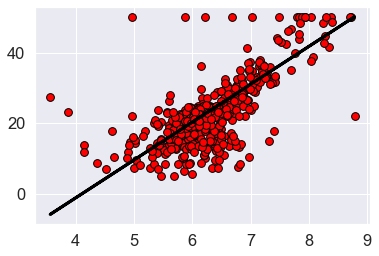

Slope: 10.735
Intercept: -44.089


In [16]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=60,c='red',edgecolor='black')
plt.plot(x,y_pred,lw=3,c='black')
plt.show()
print('Slope: %.3f'%ransac.estimator_.coef_[0])
print('Intercept: %.3f'%ransac.estimator_.intercept_)

Show Inlier and outlier data with threshold

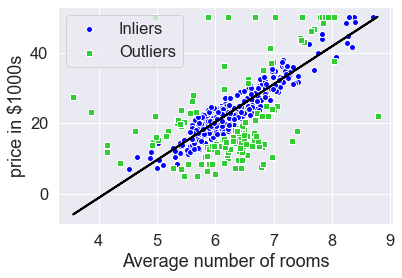

In [17]:
import numpy as np
inliner_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inliner_mask)
plt.scatter(x[inliner_mask],y[inliner_mask],c='blue',
            edgecolor='white',marker='o',label='Inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],c='limegreen',
            edgecolor='white',marker='s',label='Outliers')
plt.plot(x,y_pred,color='black',lw=2)
plt.xlabel('Average number of rooms')
plt.ylabel('price in $1000s')
plt.legend(loc='upper left')
plt.show()

Compute Performance Metrics of fitted model

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE:=',mean_squared_error(y,y_pred))
print('R2-Score:=',r2_score(y,y_pred))

MSE:= 45.620046981583364
R2-Score:= 0.4596033305696132
